# Predicting Olympics Medals from Historic data 

`Open Data from Kaggle on the number of medals won by each country.` 
Data can be downloaded from Kaggle. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler
import math
pd.options.display.max_rows = 3000

In [2]:
olympics  = pd.read_csv('Data/olympicsteams.csv')

In [3]:
#preview dataframe
olympics.head(10)

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
5,AFG,2008,4,4,22.5,179.2,62.8,0.0,1
6,AFG,2012,6,6,24.8,171.7,60.8,1.0,1
7,AFG,2016,3,3,24.7,173.7,74.0,1.0,0
8,AHO,1964,4,4,28.5,171.2,69.4,0.0,0
9,AHO,1968,5,4,31.0,173.2,67.8,0.0,0


### Feature Selection

In [4]:
olympics.corr()

,year,athletes,events,age,height,weight,prev_medals,medals
year,1.000000,-0.078059,-0.039492,-0.013355,-0.011517,0.024624,-0.017917,-0.034870
athletes,-0.078059,1.000000,0.976563,0.035079,0.188917,0.108703,0.810576,0.839909
events,-0.039492,0.976563,1.000000,0.053747,0.211017,0.125992,0.752264,0.770646
age,-0.013355,0.035079,0.053747,1.000000,0.173711,0.213656,0.032596,0.023231
height,-0.011517,0.188917,0.211017,0.173711,1.000000,0.685961,0.138682,0.141946
weight,0.024624,0.108703,0.125992,0.213656,0.685961,1.000000,0.088706,0.089701
prev_medals,-0.017917,0.810576,0.752264,0.032596,0.138682,0.088706,1.000000,0.920048
medals,-0.034870,0.839909,0.770646,0.023231,0.141946,0.089701,0.920048,1.000000


Based on the coprrelation above, *athletes*, *prev_medals*, *medals* are selected. 
We need team and year to identify & classify the results.

In [5]:
selected = olympics[['team','year','events','athletes','prev_medals','medals']]

In [6]:
selected.head(10)

,team,year,events,athletes,prev_medals,medals
0,AFG,1964,8,8,0.0,0
1,AFG,1968,5,5,0.0,0
2,AFG,1972,8,8,0.0,0
3,AFG,1980,11,11,0.0,0
4,AFG,2004,5,5,0.0,0
5,AFG,2008,4,4,0.0,1
6,AFG,2012,6,6,1.0,1
7,AFG,2016,3,3,1.0,0
8,AHO,1964,4,4,0.0,0
9,AHO,1968,4,5,0.0,0


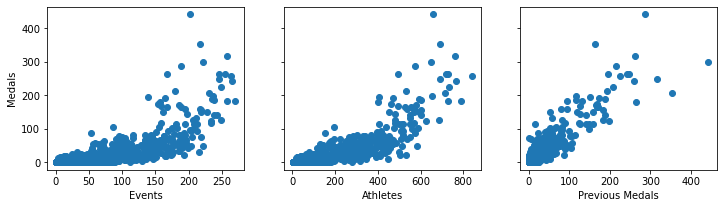

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
ax1.scatter(selected['events'],selected['medals'])
ax1.set_xlabel('Events')
ax2.scatter(selected['athletes'],selected['medals'])
ax2.set_xlabel('Athletes')
ax3.scatter(selected['prev_medals'],selected['medals'])
ax3.set_xlabel('Previous Medals')

ax1.set_ylabel("Medals")
plt.show()

In [8]:
selected.dtypes

team            object
year             int64
events           int64
athletes         int64
prev_medals    float64
medals           int64
dtype: object

In [9]:
selected.describe()

,year,events,athletes,prev_medals,medals
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,1995.227408,36.877855,76.329692,10.248759,10.990070
std,15.227727,50.130877,129.799427,31.951920,33.627528
min,1964.000000,1.000000,1.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,0.000000,0.000000
50%,1996.000000,14.000000,21.000000,0.000000,0.000000
75%,2008.000000,47.000000,74.750000,4.000000,5.000000
max,2016.000000,270.000000,839.000000,442.000000,442.000000


In [10]:
X_features=['events','athletes','prev_medals']

In [11]:
train_df = selected[selected['year']<2012]
test_df  = selected[selected['year']>=2012]
X_train=np.array(train_df[['events','athletes','prev_medals']])
y_train=np.array(train_df['medals'])
non_normalised_test_df=test_df.copy()

### Without Normalizing

In [12]:
sgdr = LinearRegression()
sgdr.fit(X_train,y_train)

LinearRegression()

In [13]:
b = sgdr.intercept_
w = sgdr.coef_
print(f"model parameters:                   w: {w}, b:{b}")

model parameters:                   w: [-0.39594646  0.23195354  0.68192424], b:0.7166644774008013


In [14]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_train)
# make a prediction using w,b. 
y_pred = np.dot(X_train, w) + b 
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[-0.59527893 -0.10330015 -0.59527893 -1.0872577 ]
Target values 
[0 0 0 0]


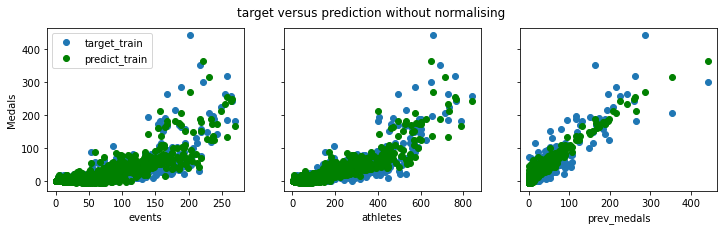

In [15]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target_train')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='g', label = 'predict_train')
ax[0].set_ylabel("Medals"); ax[0].legend();
fig.suptitle("target versus prediction without normalising")
plt.show()

### Test the Model

In [16]:
X_test=np.array(test_df[['events','athletes','prev_medals']])
y_test=np.array(test_df['medals'])

In [17]:
y_test_pred = sgdr.predict(X_test)

In [18]:
y_test_pred.shape

(405,)

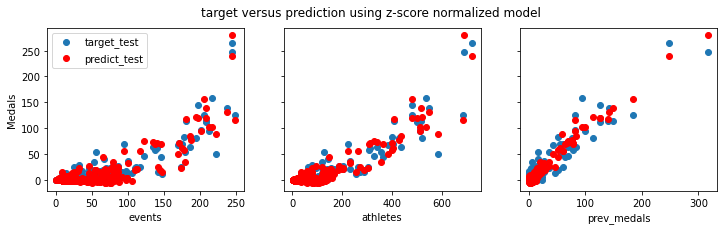

In [19]:
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target_test')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_test[:,i],y_test_pred,color='r', label = 'predict_test')
ax[0].set_ylabel("Medals"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

#### Converted all negative predictions to Zero since that does not make sense. Rounded predictions to whole numbers

In [20]:
#test_df['pred']=np.where(Y_test_pred<0,0,np.round(Y_test_pred))

non_normalised_test_df['pred']=np.where(y_test_pred<0,0,np.round(y_test_pred))

In [21]:
non_normalised_test_df.head(10)

,team,year,events,athletes,prev_medals,medals,pred
6,AFG,2012,6,6,1.0,1,0.0
7,AFG,2016,3,3,1.0,0,1.0
23,ALB,2012,9,10,0.0,0,0.0
24,ALB,2016,6,6,0.0,0,0.0
35,ALG,2012,29,39,2.0,1,0.0
36,ALG,2016,48,74,1.0,2,0.0
45,AND,2012,6,6,0.0,0,0.0
46,AND,2016,4,4,0.0,0,0.0
53,ANG,2012,10,35,0.0,0,5.0
54,ANG,2016,10,26,0.0,0,3.0


In [22]:
r2_score(non_normalised_test_df['medals'], non_normalised_test_df['pred'])

0.9290930012574431

### Normalized Model

In [23]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[269. 838. 442.]
Peak to Peak range by column in Normalized X:[ 5.38374166  6.36005069 13.69424679]


In [24]:
sgdr = LinearRegression()
sgdr.fit(X_norm,y_train)

LinearRegression()

In [25]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-19.78356416  30.56218794  22.01001034], b:11.293349906774392


In [26]:
# make a prediction using sgdr.predict()
y_norm_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_norm_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[-0.59527893 -0.10330015 -0.59527893 -1.0872577 ]
Target values 
[0 0 0 0]


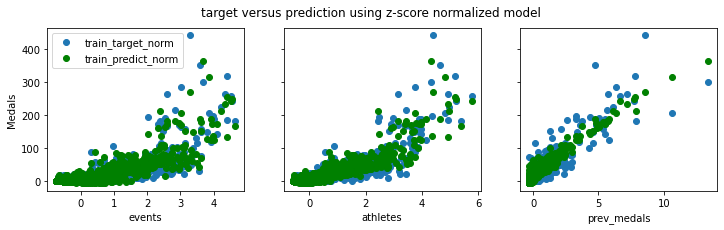

In [27]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, label = 'train_target_norm')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_norm[:,i],y_norm_pred_sgd,color='g', label = 'train_predict_norm')
ax[0].set_ylabel("Medals"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [28]:
X_test=np.array(test_df[['events','athletes','prev_medals']])
y_test=np.array(test_df['medals'])

In [29]:
X_test_norm = scaler.fit_transform(X_test)

In [30]:
y_test_norm_pred = sgdr.predict(X_test_norm)


In [31]:
y_test_norm_pred.shape

(405,)

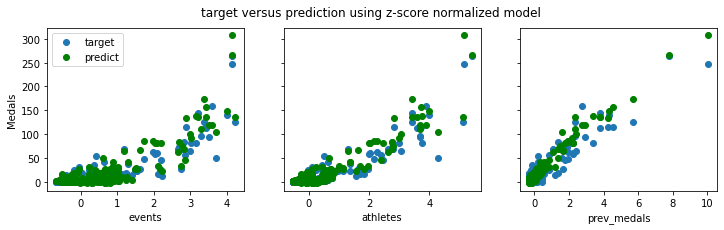

In [32]:
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test_norm[:,i],y_test, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_test_norm[:,i],y_test_norm_pred,color='g', label = 'predict')
ax[0].set_ylabel("Medals"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [33]:
norm_test_df=test_df.copy()
norm_test_df['pred']=np.where(y_test_norm_pred<0,0,np.round(y_test_norm_pred))

In [34]:
norm_test_df.head(10)

,team,year,events,athletes,prev_medals,medals,pred
6,AFG,2012,6,6,1.0,1,1.0
7,AFG,2016,3,3,1.0,0,2.0
23,ALB,2012,9,10,0.0,0,0.0
24,ALB,2016,6,6,0.0,0,0.0
35,ALG,2012,29,39,2.0,1,1.0
36,ALG,2016,48,74,1.0,2,2.0
45,AND,2012,6,6,0.0,0,0.0
46,AND,2016,4,4,0.0,0,1.0
53,ANG,2012,10,35,0.0,0,6.0
54,ANG,2016,10,26,0.0,0,4.0


In [35]:
r2_score(norm_test_df['medals'], norm_test_df['pred'])

0.8982108785387276

In [36]:
norm_test_df.to_csv('normalised_pred.csv')
non_normalised_test_df.to_csv('non_normalised_pred.csv')

### MAE Test

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
error = mean_absolute_error(non_normalised_test_df['medals'],non_normalised_test_df['pred'])
error

3.269135802469136

In [39]:
error_norm = mean_absolute_error(norm_test_df['medals'],norm_test_df['pred'])
error_norm

3.977777777777778

### Summary

>The normalised model performed worse than the non-normalised model in both r2 score & mae.

>This is likely due to the more important features having higher weights in the dataset.

>In general, the normal model predicts well with an r2 score of 0.92 and a mae of 3.27. 